In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data And Preprocess Them

In [90]:
df = pd.read_csv("home_cost.csv")
df.dropna(inplace=True)
df.drop_duplicates()
df = df.sort_values(by='Address')
cnter = 0
str = ' '
###############################################
for i in df.index:

    try:
        df.astype({'Area': 'float64'})
    except ValueError:
        df.drop(i, inplace = True)
        continue
###############################################
    if float(df.loc[i,'Area']) > 500 :
        print(df.loc[i,'Area'])
        df.drop(i, inplace = True )
        continue
############################################### 
    if df.loc[i,'Parking']:
        df.loc[i,'Parking'] = 1
    else:   
        df.loc[i,'Parking'] = 0
        #print(i)
###############################################
    if df.loc[i,'Address'] != str:
        cnter = cnter +1
        str =  df.loc[i,'Address']
        df.loc[i,'Address'] = cnter
    else:   
        df.loc[i,'Address'] = cnter
###############################################
    if df.loc[i,'Warehouse'] :
        df.loc[i,'Warehouse'] = 1
    else:    
        df.loc[i,'Warehouse'] = 0
###############################################
    if df.loc[i,'Elevator'] :
        df.loc[i,'Elevator'] = 1
    else:    
        df.loc[i,'Elevator'] = 0
###############################################
    if float(df.loc[i,'Area']) > 1000 :
        print(df.loc[i,'Area'])
        df.drop(i, inplace = True )  
###############################################

df.head(30)


630
750
929


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2928,96,3,1,0,1,1,1.145000e+09,38166.67
2314,220,4,1,1,0,1,7.500000e+09,250000.00
3249,127,2,1,1,1,1,2.500000e+09,83333.33
2645,60,1,1,1,0,1,6.000000e+08,20000.00
127,85,2,1,1,1,1,1.419000e+09,47300.00
2150,44,1,0,1,0,1,5.700000e+08,19000.00
3455,80,2,0,1,1,1,4.100000e+08,13666.67
2102,50,1,1,1,0,1,5.000000e+08,16666.67
87,140,1,0,0,0,1,5.800000e+08,19333.33
2985,102,2,1,1,1,1,1.225000e+09,40833.33


In [91]:
df.astype({'Parking': 'float64'})
df.astype({'Room'   : 'float64'})
df.astype({'Warehouse': 'float64'})
df.astype({'Elevator': 'float64'})
df.astype({'Address': 'float64'})
df.astype({'Area': 'float64'})
df.dtypes
#df.head(30)

Area           object
Room            int64
Parking        object
Warehouse      object
Elevator       object
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [92]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Address','Price']]
cdf.head()




,Area,Room,Parking,Warehouse,Elevator,Address,Price
2928,96,3,1,0,1,1,1.145000e+09
2314,220,4,1,1,0,1,7.500000e+09
3249,127,2,1,1,1,1,2.500000e+09
2645,60,1,1,1,0,1,6.000000e+08
127,85,2,1,1,1,1,1.419000e+09


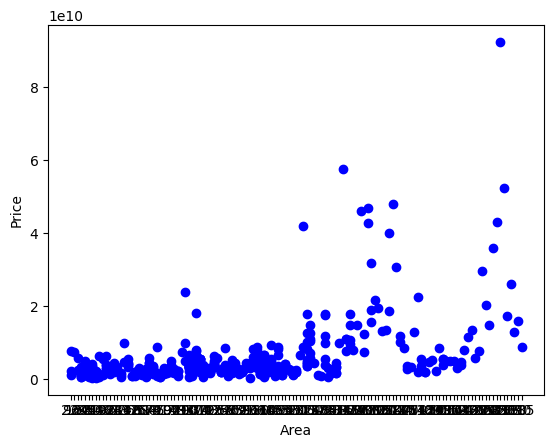

pandas.core.frame.DataFrame

In [113]:
plt.scatter(cdf.Area,cdf.Price, color= 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()
type(cdf)

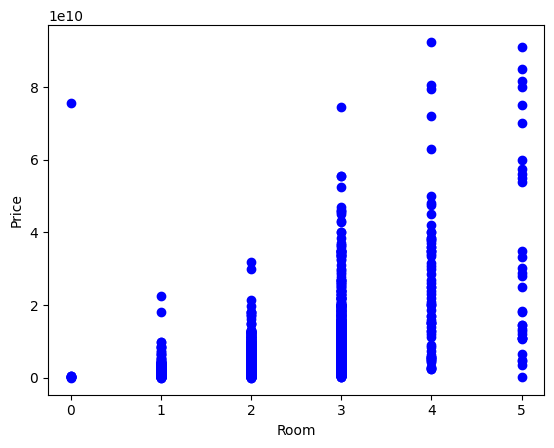

In [7]:
plt.scatter(cdf.Room,cdf.Price, color= 'blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

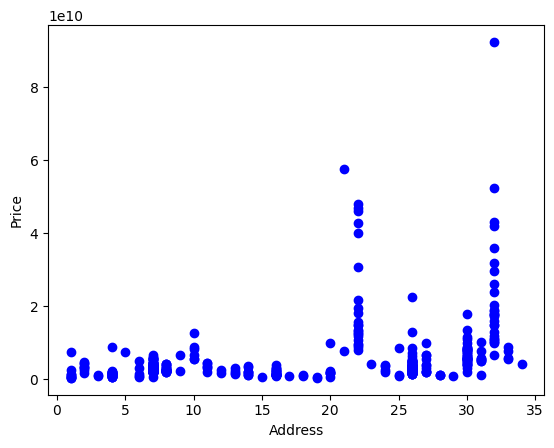

In [94]:
plt.scatter(cdf.Address,cdf.Price, color= 'blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

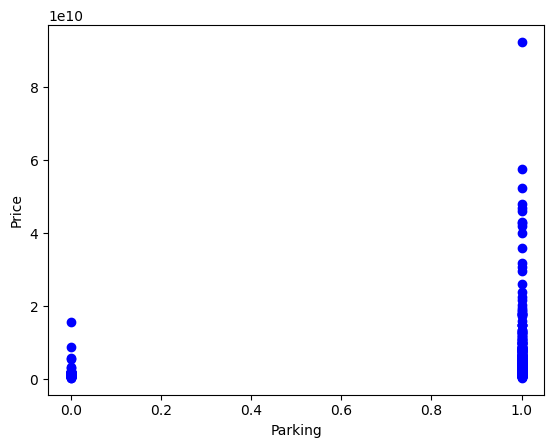

In [95]:
plt.scatter(cdf.Parking,cdf.Price, color= 'blue')
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

In [96]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [111]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)
print("Coefficients:",regr.coef_)
print("intercept:",regr.intercept_)

Coefficients: [[ 1.68236585e+08 -2.99990585e+09  7.09479621e+08  6.55333652e+08
  -8.01495699e+08  6.63882887e+07]]
intercept: [-6.8310414e+09]


In [112]:
from sklearn.metrics import r2_score
y_hat = regr.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
y = np.asanyarray(test[['Price']])

print("Mean absolote error : %.2f" % np.mean((y_hat - y)**2))

print("R2_score: %.2f" % regr.score(x,y))

/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean absolote error : 11867252343415918592.00
R2_score: 0.71
